# Simple Classifer: QDA

In [2]:
import pandas as pd

# import sk-learn libraries
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, RocCurveDisplay

import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("../../data/parsed_data.csv") # 7 to 43 #, usecols= [no for no in range(7, 43)]
data

,Unnamed: 0,Gene ID,Transcript ID,Position,N1,N2,N3,N1 Avg Length,N1 Min Length,N1 Max Length,...,N3 Median Length,N3 Avg SD,N3 Min SD,N3 Max SD,N3 Median SD,N3 Avg Mean,N3 Min Mean,N3 Max Mean,N3 Median Mean,Label
0,0,ENSG00000004059,ENST00000000233,244,AAGAC,AGACC,GACCA,0.008264,0.00199,0.0339,...,0.005980,4.386989,0.773,15.50,3.440,80.570270,73.1,88.3,80.50,0
1,1,ENSG00000004059,ENST00000000233,261,CAAAC,AAACT,AACTG,0.006609,0.00199,0.0222,...,0.006790,3.016599,0.715,14.10,2.660,94.290698,88.6,103.0,94.10,0
2,2,ENSG00000004059,ENST00000000233,316,GAAAC,AAACA,AACAG,0.007570,0.00232,0.0299,...,0.006310,2.087146,0.630,6.85,1.910,89.364324,84.4,96.2,89.20,0
3,3,ENSG00000004059,ENST00000000233,332,AGAAC,GAACA,AACAT,0.010620,0.00232,0.0370,...,0.004980,2.236520,0.884,6.49,2.135,89.154000,81.4,95.7,89.90,0
4,4,ENSG00000004059,ENST00000000233,368,AGGAC,GGACA,GACAA,0.010701,0.00199,0.0478,...,0.008695,4.260253,1.040,8.81,4.160,85.178788,77.6,90.5,85.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121833,121833,ENSG00000167747,ENST00000641834,1348,GGGAC,GGACA,GACAT,0.009594,0.00232,0.0432,...,0.004650,4.005616,1.030,12.50,3.640,82.004110,74.0,92.8,82.10,1
121834,121834,ENSG00000167747,ENST00000641834,1429,CTGAC,TGACA,GACAC,0.008393,0.00232,0.0262,...,0.004820,3.644638,1.580,6.50,3.440,80.497101,75.0,90.6,80.60,0
121835,121835,ENSG00000167747,ENST00000641834,1531,TGGAC,GGACA,GACAC,0.008161,0.00232,0.0315,...,0.005790,2.181563,1.040,7.19,1.925,84.190625,78.2,88.1,84.50,1
121836,121836,ENSG00000167747,ENST00000641834,1537,CTGAC,TGACC,GACCA,0.008044,0.00232,0.0483,...,0.006310,2.540877,1.190,6.50,2.330,82.289474,77.6,87.4,82.00,0


In [4]:
X = data.drop(columns=['Label','Transcript ID','Position','N1','N2','N3'])
y = data['Label']
groups = data['Gene ID']

gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=21)

for train_idx, test_idx in gss.split(X, y, groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

X_train = X_train.drop(columns=['Gene ID'])
X_test = X_test.drop(columns=['Gene ID'])

# QDA

In [5]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [6]:
score = qda.score(X_test, y_test)
y_pred = qda.predict(X_test)
score

0.9472818423938587

Text(0.5, 1.0, 'Confusion Matrix for QDA')

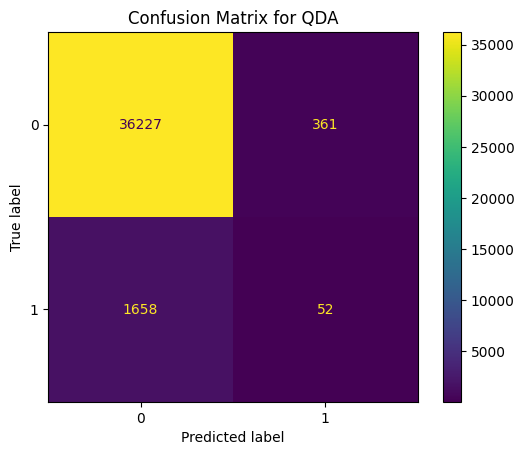

In [7]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title('Confusion Matrix for QDA')

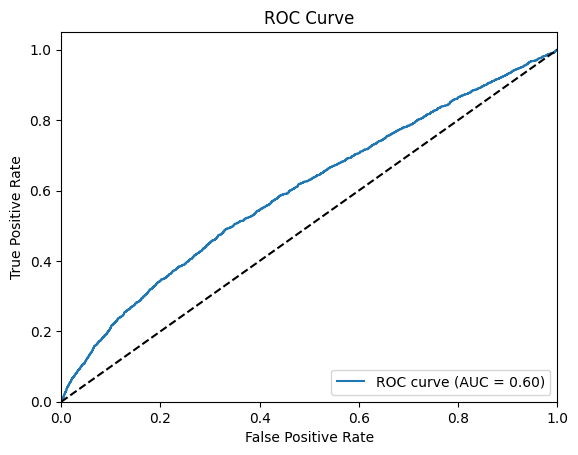

In [8]:
y_prob = qda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# QDA (with Undersampling)

In [9]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=21)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_train_resampled)}")


Original class distribution: Counter({0: 79775, 1: 3765})
Resampled class distribution: Counter({0: 3765, 1: 3765})


In [10]:
qda.fit(X_train_resampled, y_train_resampled)

QuadraticDiscriminantAnalysis()

In [11]:
score = qda.score(X_test, y_test)
y_pred = qda.predict(X_test)
score

0.6732727557574808

Text(0.5, 1.0, 'Confusion Matrix for QDA')

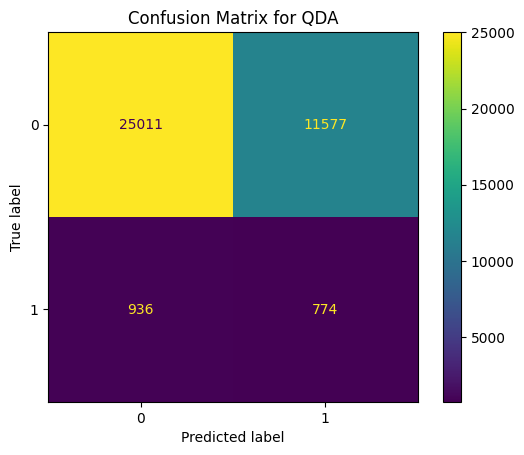

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title('Confusion Matrix for QDA')

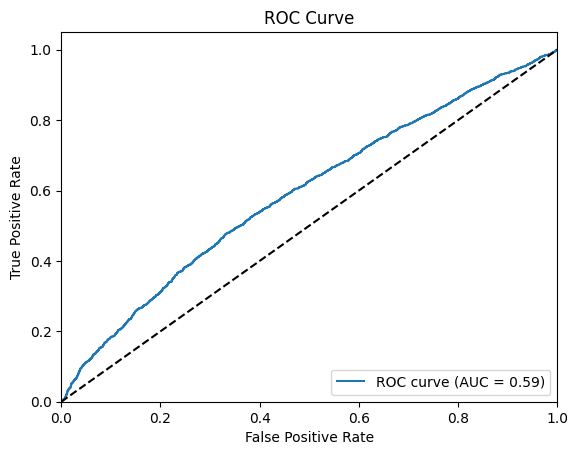

In [13]:
y_prob = qda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# QDA (with Oversampling)

In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=21)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f"Resampled class distribution: {Counter(y_resampled)}")


Resampled class distribution: Counter({0: 79775, 1: 79775})


In [15]:
qda.fit(X_resampled, y_resampled)

QuadraticDiscriminantAnalysis()

In [16]:
score = qda.score(X_test, y_test)
y_pred = qda.predict(X_test)
score

0.5471565094783017

Text(0.5, 1.0, 'Confusion Matrix for QDA')

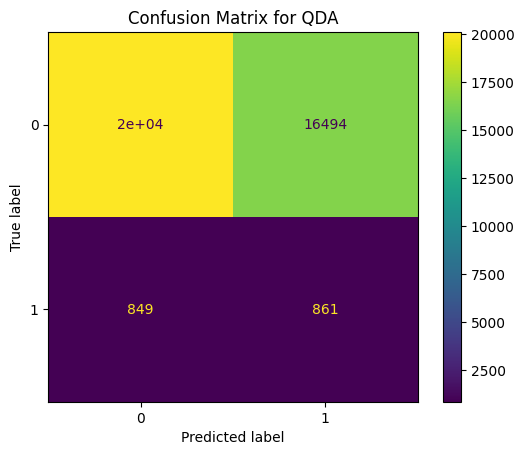

In [17]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title('Confusion Matrix for QDA')

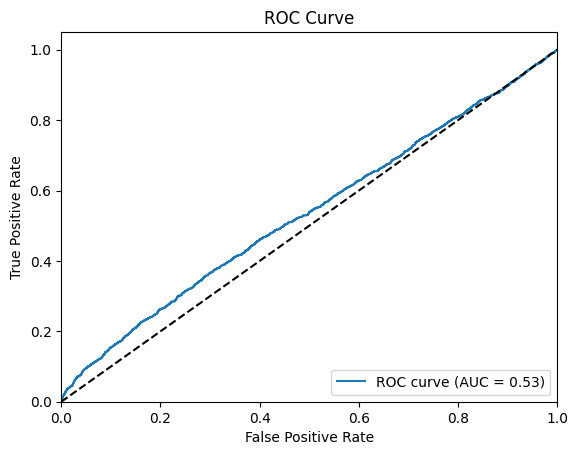

In [18]:
y_prob = qda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()